## Imports


In [25]:
import numpy
import cv2

from functools import lru_cache

In [26]:
from modules.localiser import Localiser
from modules.zoomTestBench import Zoom

## Instances


In [27]:
localiser = Localiser()

## Functions


In [28]:
from IPython.display import Image, display, clear_output


def show_frame(frame: numpy.ndarray, clear: bool = True):
    """Displays and image to the output.

    Args:
        frame (numpy.ndarray): The image to show.
        clear (bool): Wether to clear the output before showing the image.
    """

    # frame_width = frame.shape[1]
    # frame_height = frame.shape[0]

    # cv2.putText(
    #     frame,
    #     f"({frame_width} x {frame_height})",
    #     (15, 30),
    #     cv2.FONT_HERSHEY_TRIPLEX,
    #     1,
    #     (0, 0, 255),
    #     2,
    # )

    params = [cv2.IMWRITE_JPEG_QUALITY, 50]

    jpg = cv2.imencode(".jpg", frame, params)[1].tobytes()

    if clear:
        clear_output(wait=True)

    display(Image(data=jpg))

In [29]:
def get_true_points(distance, angle):

    true_points_file_name = (
        f"data/centre_height/{distance}cm_{angle}_deg_points.txt"
    )

    true_points = numpy.loadtxt(
        true_points_file_name, dtype=float, delimiter=","
    )

    return true_points

In [ ]:
def save_predicted_points_non_continuous(distance, angle, points):

    pred_points_file_name = f"data/centre_height_predicted_non_continuous/{distance}cm_{angle}_deg_predicted.txt"

    numpy.savetxt(pred_points_file_name, points, delimiter=",")


def save_predicted_points_continuous(distance, angle, points):

    pred_points_file_name = f"data/centre_height_predicted_continuous/{distance}cm_{angle}_deg_predicted.txt"

    numpy.savetxt(pred_points_file_name, points, delimiter=",")

In [31]:
@lru_cache(maxsize=512)
def get_frames(distance, angle):

    left_file_name = f"data/centre_height/{distance}cm_{angle}_deg_left.png"
    left_frame = cv2.imread(left_file_name)

    right_file_name = f"data/centre_height/{distance}cm_{angle}_deg_right.png"
    right_frame = cv2.imread(right_file_name)

    return left_frame, right_frame

## Code

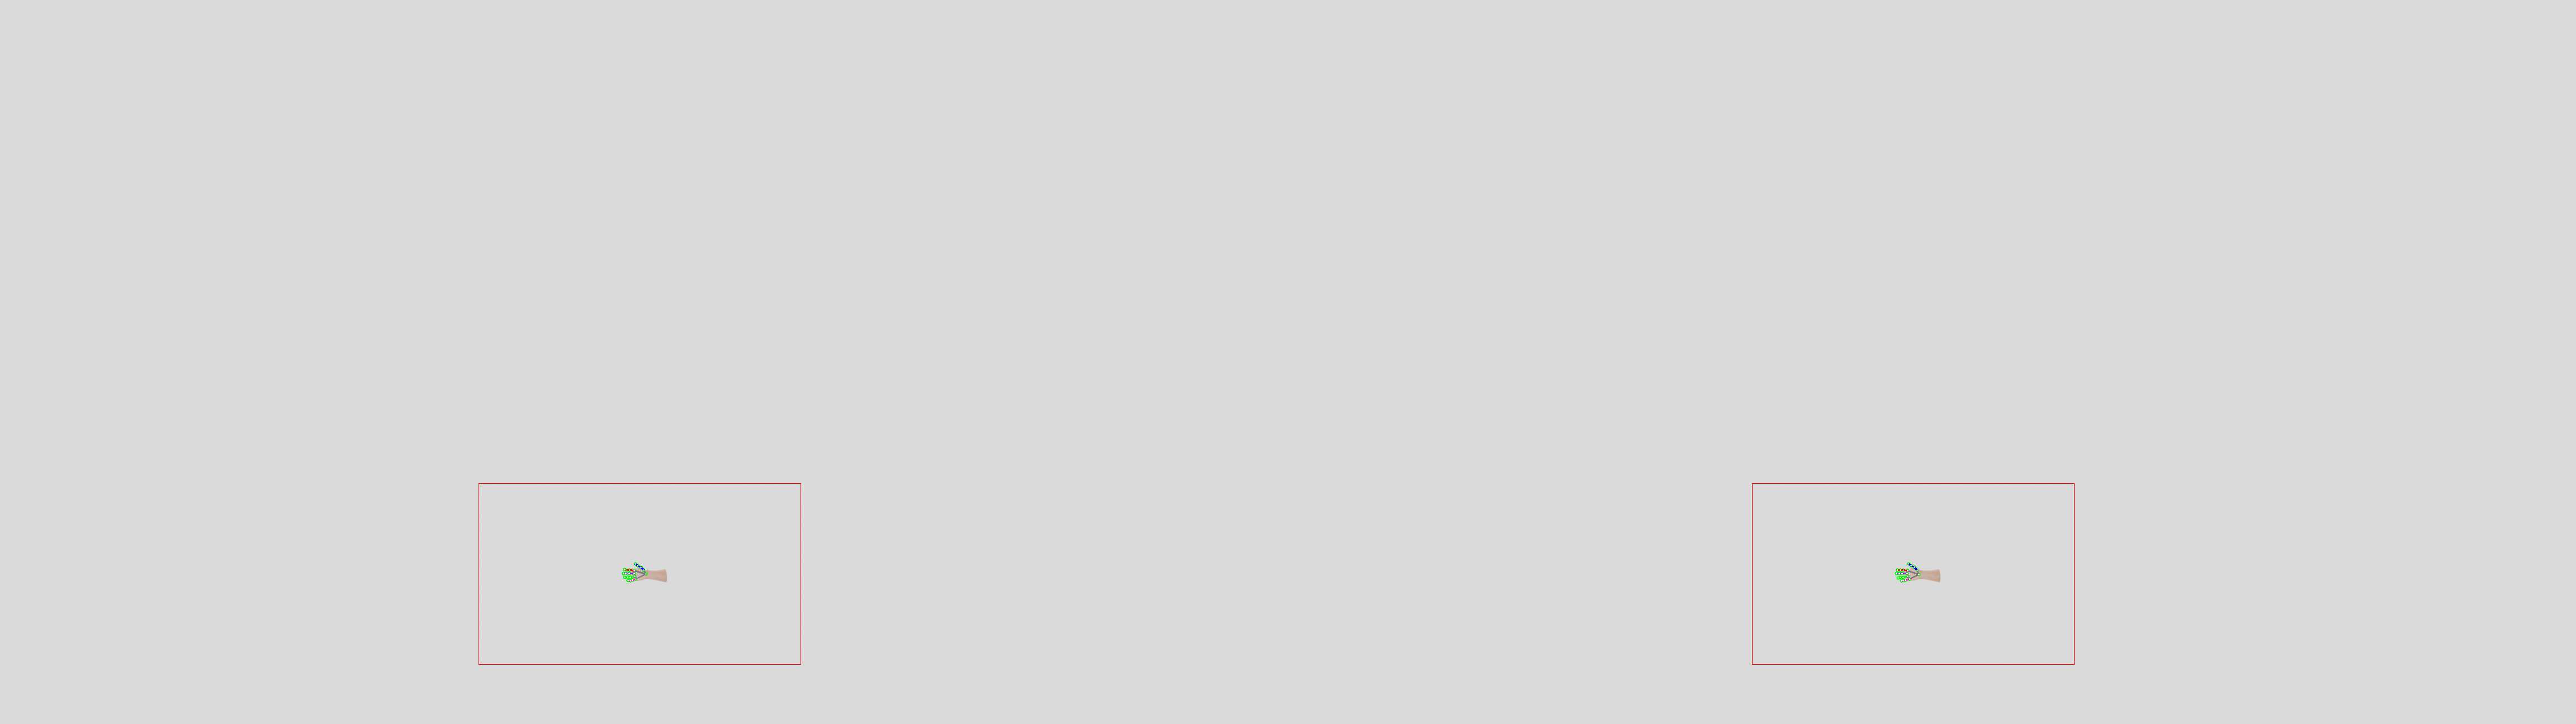

[[ 1.33185137e-02  3.76988298e+00  1.82218011e-01]
 [-3.55036772e-04  3.84786406e+00  2.07316233e-01]
 [-2.07969474e-02  3.83177270e+00  2.25525848e-01]
 [-4.03598818e-02  3.82776044e+00  2.36220330e-01]
 [-5.65315122e-02  3.86282234e+00  2.45996382e-01]
 [-6.26458737e-02  3.83470811e+00  2.03859373e-01]
 [-9.25942751e-02  3.82833806e+00  2.07521633e-01]
 [-1.10318445e-01  3.81894857e+00  2.08970740e-01]
 [-1.25877290e-01  3.81416633e+00  2.09946778e-01]
 [-6.46046335e-02  3.81538193e+00  1.85768026e-01]
 [-9.72553992e-02  3.82197185e+00  1.86336048e-01]
 [-1.17300528e-01  3.81739940e+00  1.86644835e-01]
 [-1.33486174e-01  3.80817415e+00  1.86866269e-01]
 [-6.01914943e-02  3.80750893e+00  1.69264240e-01]
 [-8.84740659e-02  3.76810933e+00  1.65218706e-01]
 [-1.07315935e-01  3.79135587e+00  1.63474394e-01]
 [-1.23341943e-01  3.81277535e+00  1.62949703e-01]
 [-5.07030300e-02  3.81886326e+00  1.53506508e-01]
 [-7.27935579e-02  3.78446297e+00  1.47333086e-01]
 [-8.76732046e-02  3.80224611e+

In [ ]:
angles = (
    0,
    10,
    20,
    30,
    40,
    50,
    60,
    70,
    80,
    90,
    100,
    110,
    120,
    130,
    140,
    150,
    160,
    170,
    180,
    190,
    200,
    210,
    220,
    230,
    240,
    250,
    260,
    270,
    280,
    290,
    300,
    310,
    320,
    330,
    340,
    350,
)


for angle in angles:

    print(f"Running Trial for Angle:{angle}")

    # Reset the finders
    left_hand_finder = Zoom(continuous=True)
    right_hand_finder = Zoom(continuous=True)

    for i in range(3):
        left_frame, right_frame = get_frames(30, angle)

        left_hand = left_hand_finder.get_hand(left_frame)
        right_hand = right_hand_finder.get_hand(right_frame)

    for i in range(37):

        dist = i * 10 + 30

        left_frame, right_frame = get_frames(dist, angle)

        left_hand = left_hand_finder.get_hand(left_frame)
        right_hand = right_hand_finder.get_hand(right_frame)

        predicted_points = localiser.get_coords(left_hand, right_hand)

        save_predicted_points_continuous(dist, angle, predicted_points)

        left_frame = left_hand_finder.draw_zoom_outline(left_frame)
        right_frame = right_hand_finder.draw_zoom_outline(right_frame)

        left_frame = left_hand.draw(left_frame)
        right_frame = right_hand.draw(right_frame)

        both_new = numpy.hstack((left_frame, right_frame))

        show_frame(both_new, clear=True)

        print(predicted_points)